In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
file = '../data/jla_binned_distances_31nodes_v1.txt'

# filefull = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_lcparams.txt'
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))
# syscov = np.loadtxt('../data/jla_v0_covmatrix.dat',skiprows=1).reshape((740,740))
# data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# data = np.loadtxt(file, usecols=[1,4], skiprows=1)
data = np.loadtxt(file, skiprows=3)
nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)
np.shape(errors)
len(data), len(errors)

(31, 31)

In [3]:
# shuffle = [x for x in range(len(data)) if x%2 == 0]
# comp = [x for x in range(len(data)) if x%2 ==1]
# shuffle.extend(comp)

shuffle = [0,30,1,2,3,4,5,6,7,8,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]
data = data[shuffle]

errors= errors[shuffle]
len(data), len(errors), len(shuffle)

(31, 31, 31)

In [4]:
dl = data[:,1]
z = data[:,0]
np.shape(z), np.shape(dl), np.shape(errors), len(data)

((31,), (31,), (31, 1), 31)

In [5]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

zz = np.log10(z)
# scalerz = MinMaxScaler(feature_range=(-1,1))
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
# zz=z

scalerdl = StandardScaler()
# scalerdl = MinMaxScaler(feature_range=(0,1))
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
# dll = dl.reshape(nsize, 1)
# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = dll
# y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
# dll

In [6]:
def model(input_z):
    efirst = Dense(100,activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
    x = Dense(150, activation='relu')(x)

    elast = Dense(1,activation='linear')(x)
    return elast

batch_size = 1
epochs = 200
# epochs = 500
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 25,601
Trainable params: 25,601
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_train = neural_model.fit(z_train, y_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/200
24/24 [==============================] - 0s 11ms/step - loss: 0.8592 - val_loss: 0.4392
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6436 - val_loss: 0.3068
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.1754
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - val_loss: 0.0382
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0129 - val_loss: 0.0057
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 6.6821e-04
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0098 - val_loss: 0.0030
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 8.1680e-04
Epoch 83/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 84/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 4.9477e-04
Epoch 85/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.4524e-04
Epoch 86/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 9.6554e-04
Epoch 87/200
24/24 [==============================] - 0s 1ms/step - loss: 8.4288e-04 - val_loss: 7.4790e-04
Epoch 88/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 3.7406e-04
Epoch 89/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 90/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.0052
Epoch 91/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0041 - va

24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 6.0263e-04
Epoch 163/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 9.3396e-04
Epoch 164/200
24/24 [==============================] - 0s 1ms/step - loss: 9.3250e-04 - val_loss: 0.0021
Epoch 165/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 166/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 4.8567e-04
Epoch 167/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 168/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 169/200
24/24 [==============================] - 0s 1ms/step - loss: 8.0519e-04 - val_loss: 0.0025
Epoch 170/200
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 171/200
24/24 [==============================] - 0s 1ms/step - loss: 7.5244e-04

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

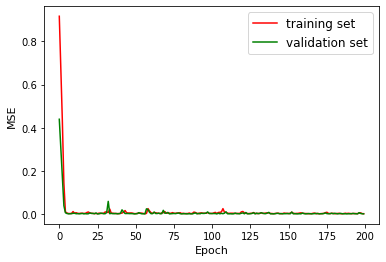

In [8]:
# plt.figure(figsize=(4, 3), dpi=100)
# plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.yscale('log')
# plt.hlines(0.1, 0, 100)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [9]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]

(0.0013265396701171994, 0.0005703362403437495, 0.00103238713927567)

In [10]:
# ranz = np.linspace(np.min(z), np.max(z), 31)
ranz = z

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
# pred_random = neural_model.predict(ranz)

pred_random = neural_model.predict(zz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random[:,0].reshape(-1,1)).reshape(nsize,)
# dlfake = pred_random.reshape(31,)
# errfake = pred_random[:,1]                                     
# dlfake = pred_random[:,0]

In [11]:
np.shape(z), np.shape(dlfake), len(z)

((31,), (31,), 31)

In [12]:
index = np.argsort(ranz)
ranz = ranz[index]

# dlfake = dlfake.reshape(31,)[index]

# fake_data = np.stack((z, dlfake[index]), axis=1)
fake_data = np.stack((ranz, dlfake[index]), axis=1)

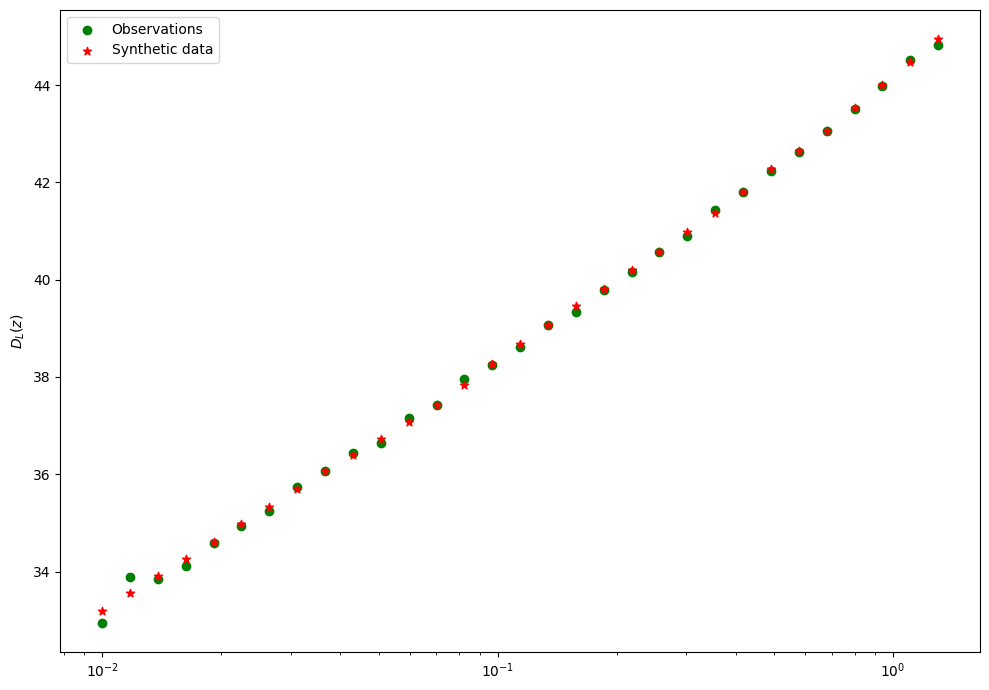

In [13]:
plt.figure(figsize=(10, 7), dpi=100)

plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(z, dlfake, c='r', label='Synthetic data', marker='*')

plt.ylabel("$D_L(z)$")
plt.xscale('log')
# plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [14]:
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
# neural_model.save('../models/FFNN_JLA.h5')

In [16]:
# plt.scatter(z, np.exp(errors), c='g', label='Real errors')
# plt.scatter(z, np.exp(errfake), c='r', label='synthetic errors')
# plt.legend()
# Revisar negativos y usar log. 